### CROSS VALIDATION

In [4]:
import pandas as pd
import numpy as np
import time

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap

#sklearn
from sklearn import datasets, svm, metrics,tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#preprocessing
from sklearn.preprocessing import StandardScaler,normalize
# Dimenionality Reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import random_projection
#Feature selection
from sklearn.feature_selection import VarianceThreshold
#Under sampling
from imblearn.under_sampling import RandomUnderSampler
#Over sampling
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,RandomOverSampler
#Combined sampling
from imblearn.combine import SMOTETomek
#Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Perceptron,PassiveAggressiveClassifier,RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import resample
from sklearn.pipeline import *
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix,classification_report,make_scorer,average_precision_score,precision_recall_curve

#import pandas_ml as pdml

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import itemfreq
import importlib
from importlib import reload  
from collections import defaultdict,Counter

from sklearn import preprocessing
%matplotlib inline 
pd.options.display.max_columns=200


from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score


np.random.seed(42)

In [5]:
import Preprocessing as pp

#reload(pp)

CRASH :  (234866, 23)
VEHICLE :  (474634, 17)
PEOPLE :  (413775, 16)
['LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'DOORING_I', 'WORK_ZONE_I', 'NUM_UNITS']
['UNIT_TYPE', 'VEHICLE_ID', 'CMRC_VEH_I', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'EXCEED_SPEED_LIMIT_I', 'CMV_ID', 'GVWR', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG']
['VEHICLE_ID', 'SEX', 'AGE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']
[]
[]
[]
Vpa rd_no :  (234682, 1)
Vpa unit 1 :  (234732, 31)
Vpa unit 2 :  (234762, 61)
Vpa unit 3 :  (234762, 91)
Vpa unit 4 :  (234762, 121)
Vpa unit 5 :  (234762, 151)
Vpa unit 6 :  (234762, 181)
cvp with duplicates: (234641, 203)
cvp without duplicates: (234584, 203)
Dataframe size after adding dummies to crashes columns:  (234584, 287)
Dataframe size after adding dummies to v

In [6]:
df=pp.cvp_ohe
train_data=df.copy(deep=True)

In [7]:
from sklearn.utils import shuffle
train_data = shuffle(train_data)

In [8]:
train_data.shape

(234584, 929)

In [9]:
train_labels=train_data[['PRIM_CONTRIBUTORY_CAUSE']].copy()
train_data=train_data.drop(['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'], axis=1)

In [10]:
train_labels.shape

(234584, 1)

### Cross Validation

In [11]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(train_data)

In [12]:
selector = VarianceThreshold()
X1 = selector.fit_transform(X_scaled)

In [13]:
#MLP
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
score_MLP = cross_val_score(clf, X1, train_labels, cv=10, scoring='f1_weighted')
score_MLP_mean = score_MLP.mean()
print("Cross validated score: ", score_MLP_mean)

Cross validated score:  0.46020702684104514


In [14]:
#Bagging with DT

clf = BaggingClassifier(DecisionTreeClassifier()) 
score_BDT = cross_val_score(clf, X1, train_labels, cv=10, scoring='f1_weighted')
score_BDT_mean = score_BDT.mean()
print("Cross validated score: ", score_BDT_mean)

Cross validated score:  0.6014734754088917


In [15]:
#LDA

clf=LDA()
score_LDA = cross_val_score(clf, X1, train_labels, cv=10, scoring='f1_weighted')
score_LDA_mean = score_LDA.mean()
print("Cross validated score: ", score_LDA_mean)

Cross validated score:  0.5696766656293317


In [16]:
#ET
clf=ExtraTreesClassifier()
score_ET = cross_val_score(clf, X1, train_labels, cv=10, scoring='f1_weighted')
score_ET_mean = score_ET.mean()
print("Cross validated score: ", score_ET_mean)

Cross validated score:  0.5747971236627658


In [17]:
#LR
clf=LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score_LR = cross_val_score(clf, X1, train_labels, cv=10, scoring='f1_weighted')
score_LR_mean = score_LR.mean()
print("Cross validated score: ", score_LR_mean)

Cross validated score:  0.5906006426852821


In [18]:
#RF
clf=RandomForestClassifier(n_estimators=100, random_state=100)
score_RF = cross_val_score(clf, X1, train_labels, cv=10, scoring='f1_weighted')
score_RF_mean = score_RF.mean()

print("Cross validated score: ", score_RF_mean)

Cross validated score:  0.5906006426852821


### Graph for cross validation scores for top performing algorithms

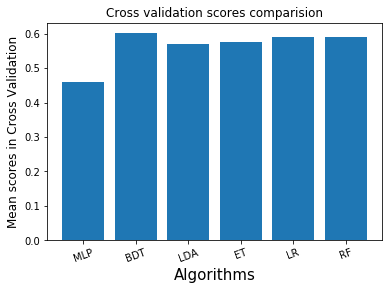

In [21]:
y = [score_MLP_mean, score_BDT_mean, score_LDA_mean, score_ET_mean, score_LR_mean, score_RF_mean]
index = np.arange(len(y))

plt.bar(index, y)
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Mean scores in Cross Validation', fontsize=12)

plt.xticks(np.arange(6), ('MLP', 'BDT', 'LDA', 'ET', 'LR', 'RF'), rotation=20)

plt.title('Cross validation scores comparision')
plt.show()

### Comparison of F1 scores between Cross Validation and Train-Test-Split

In [34]:
import pickle

algorithm_1 = pickle.load(open("algorithm_1.p","rb"))
algorithm_2 = pickle.load(open("algorithm_2.p","rb"))
algorithm_3 = pickle.load(open("algorithm_3.p","rb"))

In [35]:

for key in algorithm_1.keys():
    var = key
    exec(var + " = algorithm_1[key]")

for key in algorithm_2.keys():
    var = key
    exec(var + " = algorithm_2[key]")

for key in algorithm_3.keys():
    var = key
    exec(var + " = algorithm_3[key]")


In [36]:
algorithm_1.keys()

dict_keys(['f1_score_micro_1_GNB1', 'f1_score_wt_1_GNB1', 'precision_score_wt_1_GNB1', 'recall_score_wt_1_GNB1', 'f1_score_micro_2_GNB2', 'f1_score_wt_2_GNB2', 'precision_score_wt_2_GNB2', 'recall_score_wt_2_GNB2', 'f1_score_micro_2_GNB3', 'f1_score_wt_2_GNB3', 'precision_score_wt_2_GNB3', 'recall_score_wt_2_GNB3', 'f1_score_micro_1_LR1', 'f1_score_wt_1_LR1', 'precision_score_wt_1_LR1', 'recall_score_wt_1_LR1', 'f1_score_micro_2_LR2', 'f1_score_wt_2_LR2', 'precision_score_wt_2_LR2', 'recall_score_wt_2_LR2', 'f1_score_tsvd_micro_LR3', 'f1_score_tsvd_wt_LR3', 'precision_score_tsvd_wt_LR3', 'recall_score_tsvd_wt_LR3', 'f1_score_micro_1_RF1', 'f1_score_wt_1_RF1', 'precision_score_wt_1_RF1', 'recall_score_wt_1_RF1', 'f1_score_micro_2_RF2', 'f1_score_wt_2_RF2', 'precision_score_wt_2_RF2', 'recall_score_wt_2_RF2', 'f1_score_micro_2_RF3', 'f1_score_wt_2_RF3', 'precision_score_wt_2_RF3', 'recall_score_wt_2_RF3', 'f1_score_micro_2_RF4', 'f1_score_wt_2_RF4', 'precision_score_wt_2_RF4', 'recall_sc

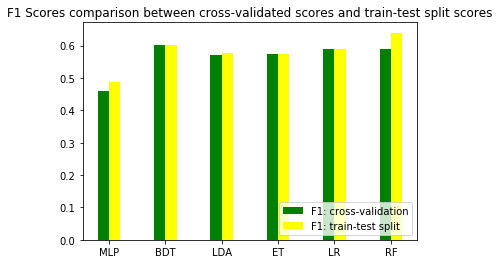

In [40]:
#Comparison of Accuracy and F1Scores
# cv_scores = [score_MLP_mean, score_BDT_mean, score_LDA_mean, score_ET_mean, score_LR_mean, score_RF_mean]
tts_scores = [f1_score_wt_MLP2, f1_score_wt_BDT2, f1_score_wt_LDA2, f1_score_wt_ET2, f1_score_wt_2_LR2, f1_score_micro_2_RF2]
cv_scores = [0.46020702684104514, 0.6014734754088917, 0.5696766656293317, 0.5747971236627658, 0.5906006426852821, 0.5906006426852821]
ind = np.arange(len(cv_scores))  # the x locations for the groups
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, cv_scores, width, color='green', label='F1: cross-validation')
rects2 = ax.bar(ind + width/2, tts_scores, width, color='yellow', label='F1: train-test split')

ax.set_title('F1 Scores comparison between cross-validated scores and train-test split scores')
ax.set_xticks(ind)
ax.set_xticklabels(('MLP','BDT', 'LDA','ET', 'LR', 'RF'))
ax.legend(loc='lower right')

### GRID Search CV to predict better performing paramaters combination

In [11]:
df1 = df.copy(deep=True)
tr_lab = df1[['PRIM_CONTRIBUTORY_CAUSE']].copy()
tr_dt = df1.drop(['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'], axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(tr_dt, tr_lab,test_size=0.20,stratify=train_labels,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

selector = VarianceThreshold()
X_train_fs = selector.fit_transform(X_train_scaled)
X_ts_fs = selector.transform(X_test_scaled)

In [15]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'base_estimator__max_depth' : [ 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = BaggingClassifier(DecisionTreeClassifier())

clf1 = GridSearchCV(clf, parameters, cv=10)

clf1.fit(X_train_fs, y_train)

out1 = clf1.predict(X_ts_fs)
f1_score_micro_gs = f1_score(y_test, out1, average='micro')